In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("dataset.csv")

In [55]:
df

,Supplier,Price,Quality,Energy Consumption,Green Design,Delivery Speed,CSR,Employee Education,cluster
0,S1,10,8,8,10,2,0.70,8,1
1,S2,4,2,6,8,2,0.75,6,0
2,S3,1,1,8,6,2,0.65,6,0
3,S4,10,10,8,10,8,0.85,8,1
4,S5,2,4,6,6,2,0.75,6,0
5,S6,10,6,8,8,8,0.85,8,1


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


In [12]:
df1=df

In [14]:
sc = StandardScaler()
X_std=sc.fit_transform(df.drop(['Supplier'], axis=1))

In [15]:
X_std

array([[ 0.97454128,  0.88982067,  0.70710678,  1.22474487, -0.70710678,
        -0.79772404,  1.        ],
       [-0.55082768, -0.99450545, -1.41421356,  0.        , -0.70710678,
        -0.11396058, -1.        ],
       [-1.31351216, -1.30855981,  0.70710678, -1.22474487, -0.70710678,
        -1.48148749, -1.        ],
       [ 0.97454128,  1.51792938,  0.70710678,  1.22474487,  1.41421356,
         1.25356634,  1.        ],
       [-1.059284  , -0.36639675, -1.41421356, -1.22474487, -0.70710678,
        -0.11396058, -1.        ],
       [ 0.97454128,  0.26171196,  0.70710678,  0.        ,  1.41421356,
         1.25356634,  1.        ]])

### Elbow Method

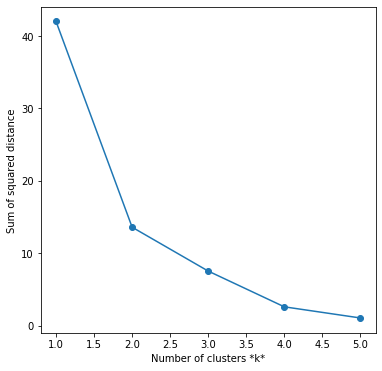

In [24]:
sse = []
list_k = list(range(1, 6))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=10)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.savefig('Elbow_method1.png')

For n_clusters = 2 The average silhouette_score is : 0.47212212082307864
For n_clusters = 3 The average silhouette_score is : 0.37608698917593447
For n_clusters = 4 The average silhouette_score is : 0.3059356316191322
For n_clusters = 5 The average silhouette_score is : 0.1593247285242991


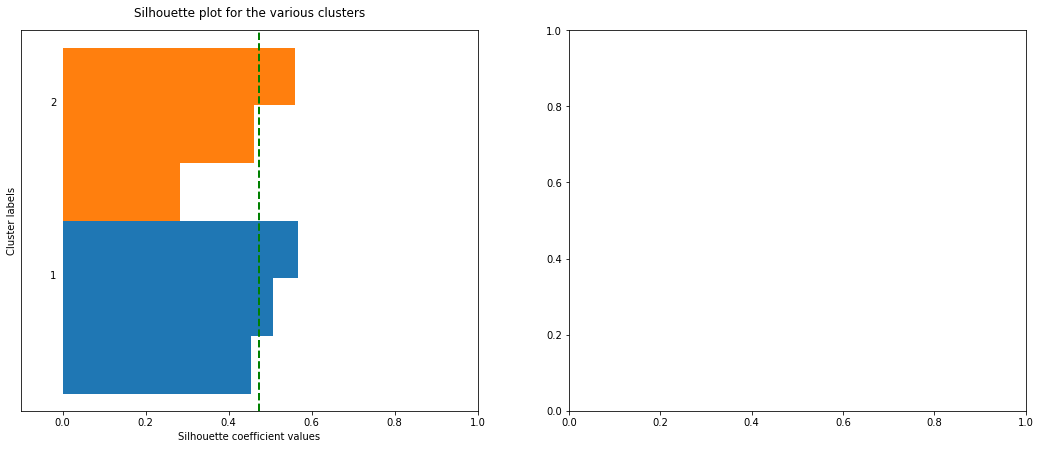

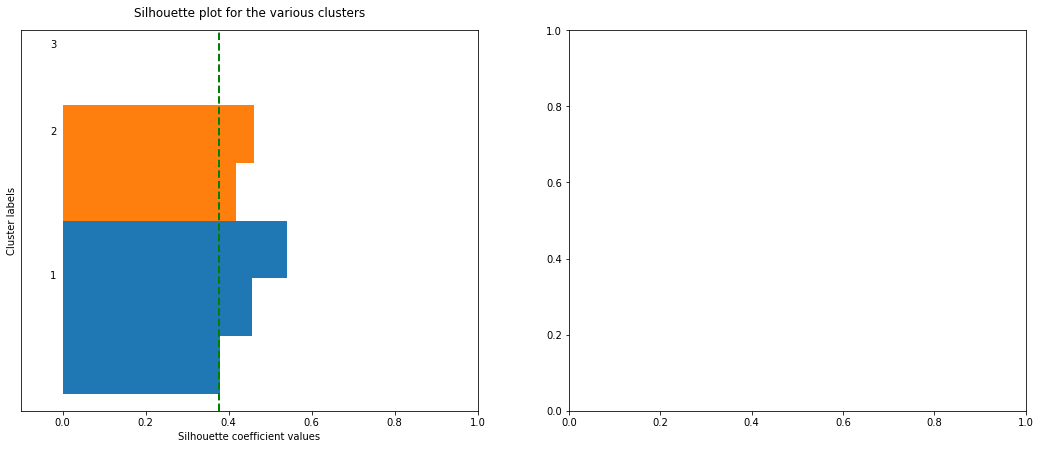

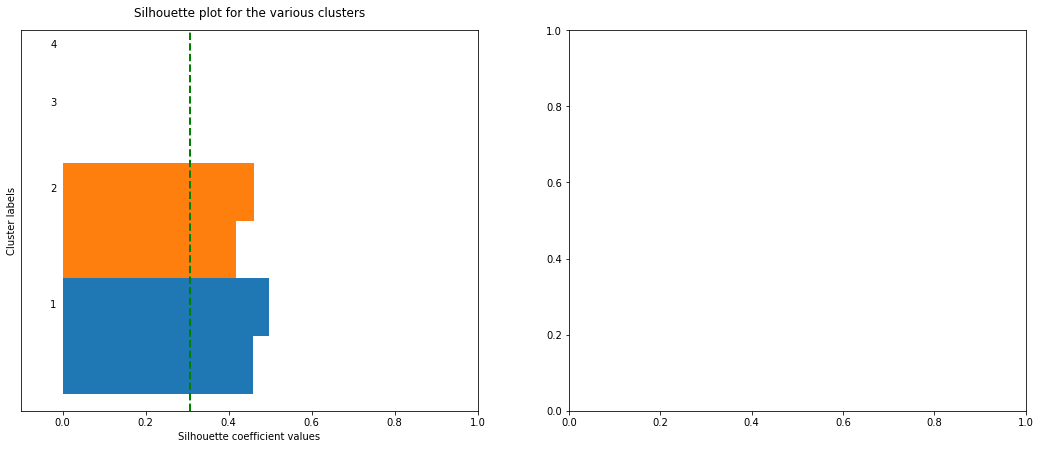

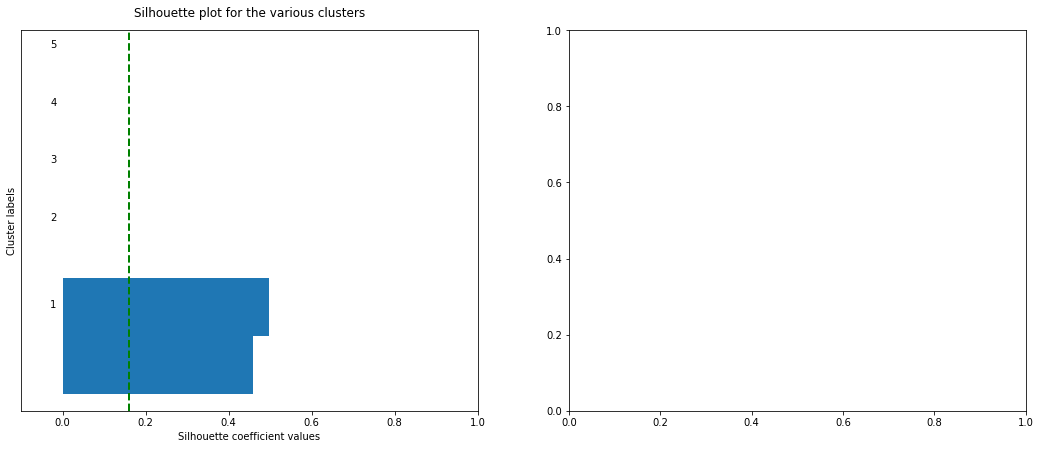

In [57]:
for i, k in enumerate([2, 3, 4, 5]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, random_state=10)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        
        
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    plt.savefig('Silhouette plot for the various clusters1_{}.png'.format(i))
    
   

In [27]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA()
pca.fit(X_std)
var=pca.explained_variance_ratio_

In [31]:
var

array([7.11996844e-01, 1.52283100e-01, 1.01360865e-01, 2.09062950e-02,
       1.34528962e-02, 3.19360653e-33])

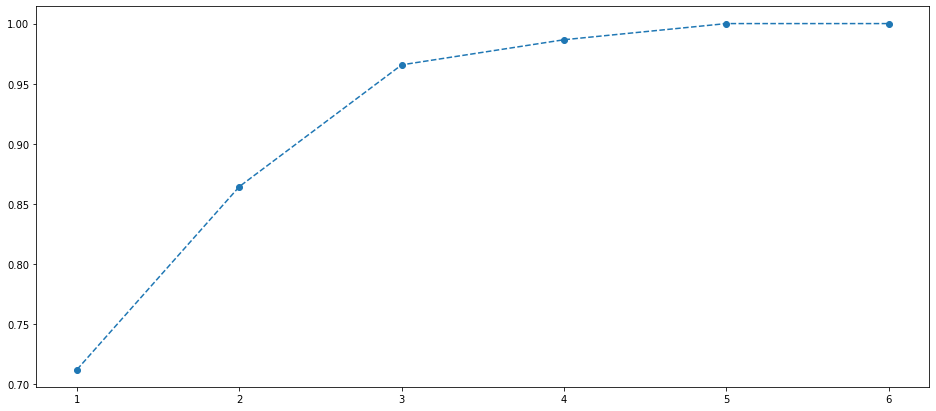

In [33]:
p=range(1,7)
plt.figure(figsize=(16,7))
plt.plot(p,var.cumsum(),marker = 'o', linestyle = '--')
plt.show()

In [34]:
pca=PCA(n_components=3)
pca_data=pca.fit_transform(X_std)


In [35]:
pca_data.shape

(6, 3)

In [36]:
pca_df=pd.DataFrame(pca_data,columns=['component1','component2','component3'])
pca_df

,component1,component2,component3
0,1.368791,1.795220,-0.852367
1,-1.774220,-0.631504,-0.931455
2,-2.532026,1.024238,1.277390
3,3.054032,-0.444877,-0.023769
4,-2.195735,-0.935343,-0.402048
5,2.079158,-0.807734,0.932249


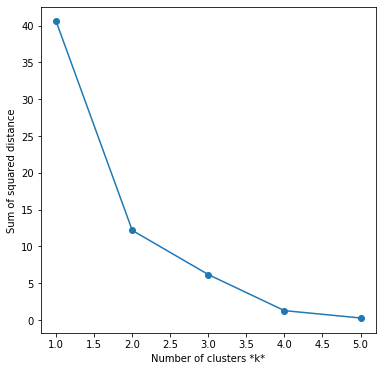

In [47]:
sse = []
list_k = list(range(1, 6))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=10)
    km.fit(pca_data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.savefig('Elbow_method2.png')

For n_clusters = 2 The average silhouette_score is : 0.5140641238275474
For n_clusters = 3 The average silhouette_score is : 0.441635428820615
For n_clusters = 4 The average silhouette_score is : 0.4226326169948613


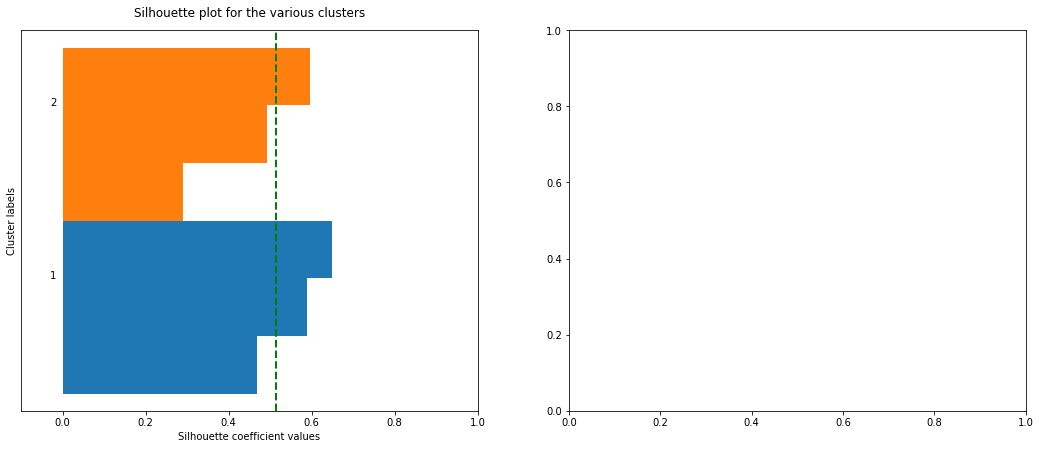

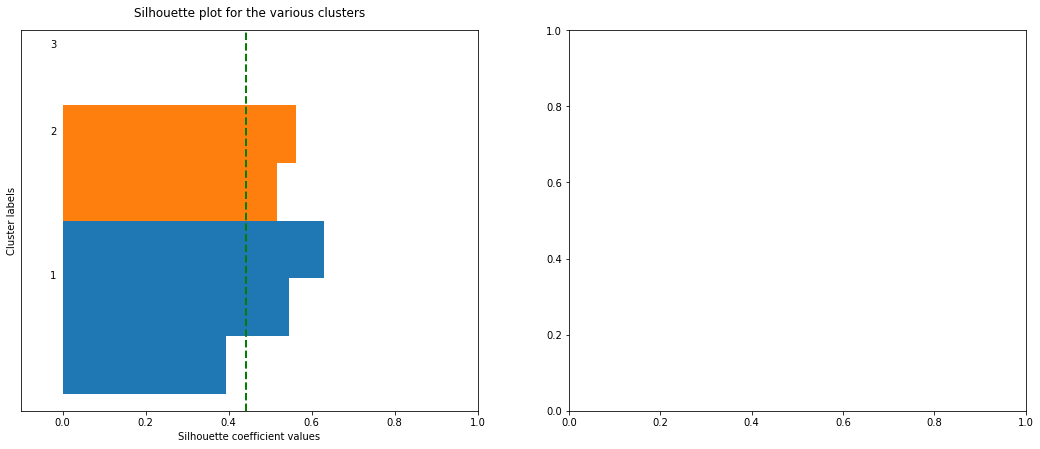

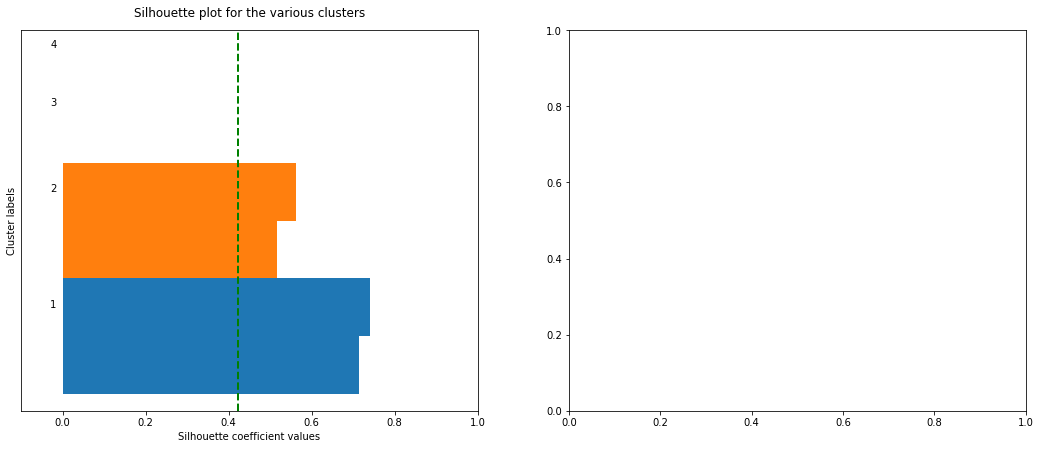

In [48]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, random_state=10)
    labels = km.fit_predict(pca_data)
    centroids = km.cluster_centers_
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_data, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

    # Get silhouette samples
    silhouette_vals = silhouette_samples(pca_data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        
        
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    plt.savefig('Silhouette plot for the various clusters2_{}.png'.format(i))

In [49]:
km=KMeans(n_clusters=2)
prediction=km.fit_predict(pca_data)

In [50]:
pca_df['cluster']=prediction
pca_df

,component1,component2,component3,cluster
0,1.368791,1.795220,-0.852367,0
1,-1.774220,-0.631504,-0.931455,1
2,-2.532026,1.024238,1.277390,1
3,3.054032,-0.444877,-0.023769,0
4,-2.195735,-0.935343,-0.402048,1
5,2.079158,-0.807734,0.932249,0


In [51]:
km=KMeans(n_clusters=2)
prediction=km.fit_predict(X_std)

In [52]:
df['cluster']=prediction
df

,Supplier,Price,Quality,Energy Consumption,Green Design,Delivery Speed,CSR,Employee Education,cluster
0,S1,10,8,8,10,2,0.70,8,1
1,S2,4,2,6,8,2,0.75,6,0
2,S3,1,1,8,6,2,0.65,6,0
3,S4,10,10,8,10,8,0.85,8,1
4,S5,2,4,6,6,2,0.75,6,0
5,S6,10,6,8,8,8,0.85,8,1


,Supplier,Price,Quality,Energy Consumption,Green Design,Delivery Speed,CSR,Employee Education,cluster
0,S1,10,8,8,10,2,0.70,8,1
1,S2,4,2,6,8,2,0.75,6,0
2,S3,1,1,8,6,2,0.65,6,0
3,S4,10,10,8,10,8,0.85,8,1
4,S5,2,4,6,6,2,0.75,6,0
5,S6,10,6,8,8,8,0.85,8,1
